## Observations and Insights 

In [170]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
fullData = pd.merge(mouse_metadata,study_results, on="Mouse ID")
# Display the data table for preview
fullData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [171]:
# Checking the number of mice.
fullData["Mouse ID"].nunique()

249

In [172]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
fullData.loc[fullData.duplicated(subset = ["Mouse ID", "Timepoint"]) == True,"Mouse ID"]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [173]:
# Optional: Get all the data for the duplicate mouse ID. 
fullData.loc[fullData.duplicated(subset = ["Mouse ID", "Timepoint"]) == True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [174]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dedupedData = fullData.drop_duplicates(subset = ["Mouse ID", "Timepoint"])

In [175]:
# Checking the number of mice in the clean DataFrame.
dedupedData["Mouse ID"].nunique()

249

## Summary Statistics

In [176]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimens = dedupedData.groupby("Drug Regimen")
summary_regimens = pd.DataFrame({
    "Mean":regimens["Tumor Volume (mm3)"].mean(),
    "Median":regimens["Tumor Volume (mm3)"].median(),
    "Variance":regimens["Tumor Volume (mm3)"].var(),
    "Standard Deviation":regimens["Tumor Volume (mm3)"].std(),
    "SEM":regimens["Tumor Volume (mm3)"].sem()
})
summary_regimens

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [177]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimens["Tumor Volume (mm3)"].agg(func=['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

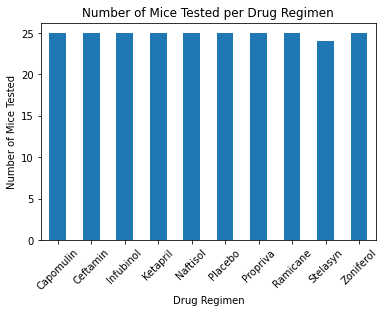

In [178]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
druggedMice = dedupedData.groupby(["Drug Regimen"])["Mouse ID"].nunique()

druggedMice.plot(kind='bar')
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested per Drug Regimen")
plt.xticks(rotation=45)
plt.show()

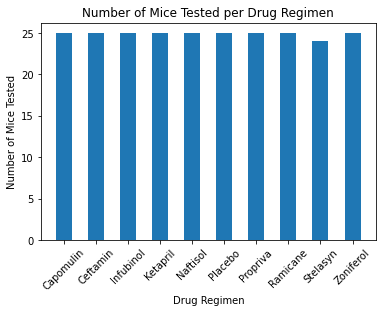

In [179]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(druggedMice.index, druggedMice.values, width=.5)
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested per Drug Regimen")
plt.show()

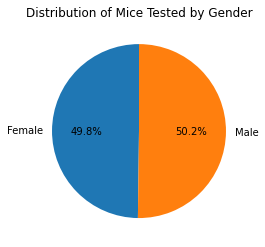

In [180]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genders = dedupedData.groupby("Sex")["Mouse ID"].nunique()
genders.plot(kind="pie", title="Distribution of Mice Tested by Gender", autopct='%1.1f%%', startangle=90)
plt.ylabel("")
plt.show()

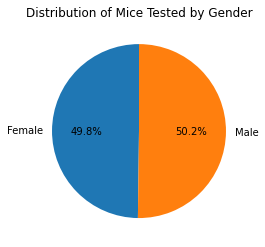

In [181]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(genders, autopct='%1.1f%%',startangle=90, labels=genders.index)
plt.title("Distribution of Mice Tested by Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [182]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lastTimes = dedupedData.groupby("Mouse ID").max()["Tumor Volume (mm3)"]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouseOutcome = pd.merge(mouse_metadata, lastTimes, on="Mouse ID")
mouseOutcome.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,45.000000
1,s185,Capomulin,Female,3,17,45.000000
2,x401,Capomulin,Female,16,15,45.473753
3,m601,Capomulin,Male,22,17,45.000000
4,g791,Ramicane,Male,11,16,45.851531


In [183]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumors = {} 

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
    justOneDrug = mouseOutcome.loc[mouseOutcome["Drug Regimen"] == drug,"Tumor Volume (mm3)"]
    tumors[drug] = justOneDrug.values
    quartiles = justOneDrug.quantile([.25,.5,.75])
    iqr = quartiles[0.75] - quartiles[0.25]
    print(f"{drug}: ")
    print(f"   The lower quartile is: {quartiles[0.25]}.")
    print(f"   The upper quartile is: {quartiles[0.75]}.")
    print(f"   The IQR is: {iqr}.")
    
    # Determine outliers using upper and lower bounds
    lower_bound = quartiles[0.25] - (1.5*iqr)
    upper_bound = quartiles[0.75] + (1.5*iqr)
    print(f"   Values below {lower_bound} could be outliers.")
    print(f"   Values above {upper_bound} could be outliers.\n")

Capomulin: 
   The lower quartile is: 45.0.
   The upper quartile is: 46.74900552.
   The IQR is: 1.7490055199999972.
   Values below 42.376491720000004 could be outliers.
   Values above 49.37251379999999 could be outliers.

Ramicane: 
   The lower quartile is: 45.0.
   The upper quartile is: 46.34383237.
   The IQR is: 1.3438323700000012.
   Values below 42.984251445 could be outliers.
   Values above 48.359580925 could be outliers.

Infubinol: 
   The lower quartile is: 54.04860769.
   The upper quartile is: 65.52574285.
   The IQR is: 11.477135160000003.
   Values below 36.83290494999999 could be outliers.
   Values above 82.74144559000001 could be outliers.

Ceftamin: 
   The lower quartile is: 48.72207785.
   The upper quartile is: 64.29983003.
   The IQR is: 15.577752179999997.
   Values below 25.355449580000002 could be outliers.
   Values above 87.66645829999999 could be outliers.



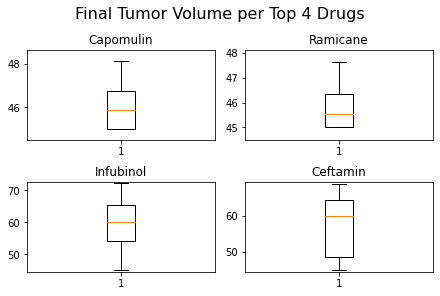

In [184]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots(2,2, constrained_layout=True)
green_diamond = dict(markerfacecolor='g', marker='D')

ax[0,0].set_title("Capomulin")
ax[0,0].boxplot(tumors["Capomulin"],flierprops=green_diamond)
ax[0,0].set_ylim(min(tumors["Capomulin"])-.5, max(tumors["Capomulin"])+.5)

ax[0,1].set_title("Ramicane")
ax[0,1].boxplot(tumors["Ramicane"],flierprops=green_diamond)
ax[0,1].set_ylim(min(tumors["Ramicane"])-.5, max(tumors["Ramicane"])+.5)

ax[1,0].set_title("Infubinol")
ax[1,0].boxplot(tumors["Infubinol"],flierprops=green_diamond)
ax[1,0].set_ylim(min(tumors["Infubinol"])-.5, max(tumors["Infubinol"])+.5)

ax[1,1].set_title("Ceftamin")
ax[1,1].boxplot(tumors["Ceftamin"],flierprops=green_diamond)
ax[1,1].set_ylim(min(tumors["Ceftamin"])-.5, max(tumors["Ceftamin"])+.5)

fig.suptitle("Final Tumor Volume per Top 4 Drugs", fontsize=16)
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Mouse s185 Tumor Volume over Time with Capomulin Treatment')

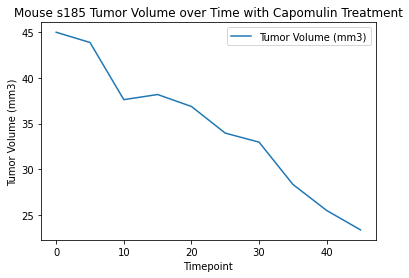

In [185]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capMouse = dedupedData.loc[dedupedData["Mouse ID"]=="s185", ["Timepoint","Tumor Volume (mm3)"]]
capMouse.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse s185 Tumor Volume over Time with Capomulin Treatment")

Text(0, 0.5, 'Tumor Volume (mm3)')

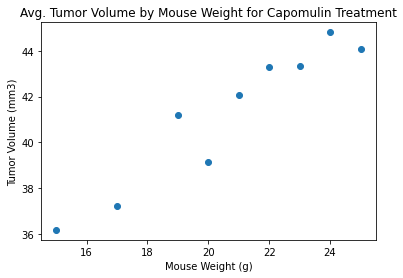

In [186]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capMice = dedupedData.loc[dedupedData["Drug Regimen"] == "Capomulin", ["Weight (g)", "Tumor Volume (mm3)"]]
weights = capMice.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
x_val = weights.index
y_val = weights.values
plt.scatter(x=x_val, y=y_val)
plt.title("Avg. Tumor Volume by Mouse Weight for Capomulin Treatment")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

In [187]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
coeff, p = st.pearsonr(x_val, y_val)
print(f"The correlation is coefficient is: {coeff}")

The correlation is coefficient is: 0.9505243961855269


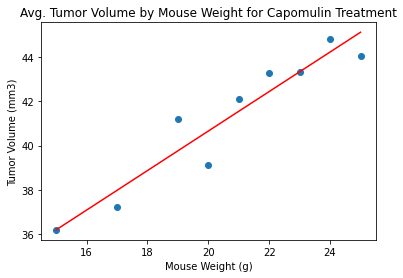

In [189]:
slope, inter, rval, pval, st = linregress(x_val, y_val)
regress = x_val * slope + inter
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inter,2))
plt.scatter(x_val,y_val)
plt.title("Avg. Tumor Volume by Mouse Weight for Capomulin Treatment")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_val,regress,"r-")
plt.show()